### Numpy
Numpy ist eine performante Bibliothek für numerische Operationen in Python. Der Kern von Numpy ist die `array` Datenstruktur.

Neben dieser kurzen Einführung ist auch dieses Tutorial empfehlenswert (Englisch): https://numpy.org/doc/stable/user/quickstart.html

In der Notebook Version dieses Tutorials können Sie die Beispiele auch bearbeiten und experimentieren

In [1]:
import numpy as np  # Es ist üblich, numpy als np zu importieren

np.array([1, 2, 3, 4, 5])

array([1, 2, 3, 4, 5])

Anders als Python Listen haben Numpy Arrays einen festen Datentyp. Dieser wird bei der Initialisierung automatisch aus den gegeben Werten ermittelt.

In [2]:
np.array([1, 2, 3, 4, 5]).dtype

dtype('int32')

In [3]:
np.array([1, 2, 2.5]).dtype

dtype('float64')

Standardmäßig werden Arrays mit Fließkommazahlen mit double precision (float64) initialisiert. Wenn aus Speicher- oder Leistungsgründen single precision gewünscht wird, kann das Array folgendermaßen initialisiert werden:

In [4]:
np.array([1, 2, 2.4], dtype=np.float32).dtype

dtype('float32')

Es findet keine automatische Konvertierung von Arraytypen statt (beachten Sie bei dem folgenden Beispiel, dass Arrays 0-indiziert sind):

In [5]:
a = np.array([1, 2, 3, 4, 5])
print(a.dtype)
a[3] = 3.5
print(a.dtype)
print(a)

int32
int32
[1 2 3 3 5]


Wenn Sie in ein integer Array Fließkommazahlen schreiben möchten, müssen Sie es zuerst konvertieren:

In [6]:
a = np.array([1, 2, 3, 4, 5])
a = a.astype(np.float64)
a[3] = 3.5
print(a.dtype)
print(a)

float64
[1.  2.  3.  3.5 5. ]


Eine wichtige Funktionalität von Arrays ist, dass sie mehrdimensional sein können, mit einer belibigen Anzahl an Dimensionen

In [7]:
a = np.array([[1, 2, 3],
              [4, 5, 6]])
a.shape

(2, 3)

Damit bieten sich Arrays an, Matrizen und Arrays von Matrizen darzustellen.

Es gibt auch andere Möglichkeiten, Arrays zu erstellen (entnehmen Sie die Details der jeweiligen Dokumentation)

In [8]:
print(np.arange(2, 10, 2))
print(np.linspace(0, 1, 10))
print(np.zeros((2, 3)))

[2 4 6 8]
[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[[0. 0. 0.]
 [0. 0. 0.]]


Arrays können genau wie Python `list`s indiziert werden

In [9]:
a = np.arange(20)
print(a[2:5])  # Von Index 2 (einschließlich) bis Index 5 (nicht einschließlich)
print(a[:3])   # Von Anfang bis index 3 (nicht einschließlich)
print(a[17:])  # Von Index 17 (einschließlich) bis Ende
print(a[2:10:2])  # Von 2 bis 10 (nicht einschließlich), in 2er Schritten
print(a[::2])  # Alle geraden Indizes

[2 3 4]
[0 1 2]
[17 18 19]
[2 4 6 8]
[ 0  2  4  6  8 10 12 14 16 18]


Außerdem dazu können integer Arrays als Index verwendet werden

In [10]:
a = np.array([3, 5, 6, 2, 7, 1, 8])
ind = np.array([2, 5, 1])
a[ind]  # gibt np.array([a[2], a[5], a[1]])

array([6, 1, 5])

Für Mehrdimensionale Arrays:

In [11]:
a = np.array([[0, 1,  2,  3],
              [4, 5,  6,  7],
              [8, 9, 10, 11]])
print(a[0, 0])  # Element 0 der ersten Achse, Element 0 der zweiten Achse
print(a[:2, 3:4])
print(a[2])  # Wähle Index 1 aus der ersten Achse und die gesamte zweite Achse
print(a[:, 2])  # Wähle die gesamte erste Achse und Index 1 in der zweiten Achse

0
[[3]
 [7]]
[ 8  9 10 11]
[ 2  6 10]


Mit der `reshape` Operation können Sie die Größe des Arrays verändern, solange die Gesamtanzahl der Elemente gleich bleibt. Dadurch wird das Array nicht kopiert, es ändert sich lediglich die Interpretation der Speicherregion.

In [12]:
np.arange(20).reshape(5, 4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [13]:
np.arange(20).reshape(-1, 4)  # Maximal eine Dimension kann mit -1 angegeben werden, der Wert wird dann automatisch bestimmt

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

Arrays können auch beschrieben werden

In [14]:
a = np.arange(5)
a[2] = 7
print(a)
a[2:4] = [1, 2]
print(a)

[0 1 7 3 4]
[0 1 1 2 4]


Arrays können durch mathematische Operationen miteinander oder mit Zahlen kombiniert werden. Dabei können Operationen auch gleich auf mehrere Elemente gleichzeitig angewendet werden

In [15]:
a = np.arange(5)
b = np.arange(4, -1, -1)  # [4, 3, 2, 1, 0]
print(a + b)
print(a * 7)

[4 4 4 4 4]
[ 0  7 14 21 28]


Eine Wichtige (implizite) Operation ist das Broadcasting. Damit können Sie z.B. Vektoren auf Matrizen addieren:

In [16]:
a = np.arange(20).reshape(5, 4)  # eine 5 x 4 Matrix
b = np.arange(4)
a + b

array([[ 0,  2,  4,  6],
       [ 4,  6,  8, 10],
       [ 8, 10, 12, 14],
       [12, 14, 16, 18],
       [16, 18, 20, 22]])

Im Beispiel Oben wird ein Vektor auf jede Zeile der Matrix addiert. Was aber, wenn sie Spaltenweise addieren möchten? Ändern sie im Beispiel die Dimension von `b` auf 5.

Die Dimensionen der Arrays können durch Broadcasting nur dann angeglichen werden, wenn sie in den letzten Dimension(en) übereinstimmen.

Zeilenweise Addieren ist jedoch trotzdem möglich:

In [17]:
b = np.arange(5)
a + b.reshape(5, 1)

array([[ 0,  1,  2,  3],
       [ 5,  6,  7,  8],
       [10, 11, 12, 13],
       [15, 16, 17, 18],
       [20, 21, 22, 23]])

Broadcasting kommt zum Einsatz, wenn zwei Arrays mit ungleichen Größen kombiniert werden sollen (durch eine arithmetische Operation). Dabei gelten zwei Regeln:

1. Hat ein Array weniger Dimensionen als das andere, werden implizit Dimensionen der Größe 1 *vorne* an dessen Größe angehängt bis beide gleich viele Dimensionen haben - Veranschaulichen Sie sich, dass das die Anzahl der Elemente im Array nicht verändert
2. Wenn sich die Größe der Arrays an einer Dimension unterscheidet und eines der Arrays in dieser Dimension die Größe 1 hat, werden die Einträge des Arrays entlang dieser Dimension "dupliziert" bis die Dimensionen überein stimmen.

Nicht alle Arrays können so angeglichen werden:

In [18]:
a = np.arange(20).reshape(5, 4)
b = np.arange(12).reshape(3, 4)
a + b

ValueError: operands could not be broadcast together with shapes (5,4) (3,4) 

In [19]:
# Weitere Beispiele für broadcasting:
np.arange(80).reshape(4, 5, 4) + np.arange(5).reshape(1, 5, 1)  # .reshape(5, 1) wäre auch möglich
np.arange(20).reshape(5, 4) + np.arange(5)[:, None]  # Mit None indizieren ist alternative syntax zu .reshape(5, 1)

array([[ 0,  1,  2,  3],
       [ 5,  6,  7,  8],
       [10, 11, 12, 13],
       [15, 16, 17, 18],
       [20, 21, 22, 23]])

Beim broadcasting werden nicht tatsächlich Speichereinträge vervielfältigt, es ist rein durch strides im Speicher implementiert. Die Details gehen über dieses Tutorial hinaus.

Durch broadcasting und Vektoroperationen lassen sich komplexe Operationen auf vielen Einträgen kompakt notieren. Viel wichtiger ist aber, dass durch diese Befehle besondere Vektorfunktionen Ihrer Hardware genutzt werden, die diese Operationen um ein Vielfaches schneller durchführen, als eine äquivalente `for` Schleife. Falls Sie in Ihrem Numpy Code `for` Schleifen verwenden, um Arrays zu manipulieren, überlegen Sie ob der gleiche Effekt durch Broadcasting und Vektoroperationen erreicht werden könnte.

*Beispiel*: Die folgenden zwei codeblöcke sind äquivalent:

In [20]:
%%timeit
a = np.arange(50)
for i in range(len(a)):
    a[i] += 2

14.9 µs ± 1.39 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [21]:
%%timeit
a = np.arange(50)
a += 2

1.84 µs ± 21 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Schon für diese relativ kleinen Arrays ist der Laufzeitunterschied messbar. Übrigens `%%timeit` ist eine sogenannte Magic Command, mit der in Notebooks die Ausführungszeit für eine Code-Zelle gemessen werden kann.

Das waren die wichtigsten Grundlagen von Numpy. Viele Eigenschaften, besonders broadcasting, kann man nur durch Erfahrung und Verwendung lernen. Numpy zu lernen zahlt sich aus - Quasi jede Data Science oder Machine Learning Bibliothek (inkl. die bekannten TensorFlow und PyTorch) verwenden entweder direkt numpy oder haben das gleiche Interface, inklusive der Indizierungssemantik und Broadcasting.

Abschließend wollen wir noch einige nützliche Numpy Funktionen vorstellen. Die Details entnehmen Sie wie immer der jeweiligen Dokumentation

In [22]:
a = np.arange(20).reshape(5, 4)
b = np.arange(4)

np.dot(a, b)  # Matrix/Vektormultiplikation. Äquivalent: a.dot(b) und a @ b
np.dot(a, a.T)  # .T ist die Transposition. Diese Syntax ist nur für zweidimensionale Arrays
np.transpose(a, (0, 1))  # Allgemeine Transposition mit Angabe der zu tauschenden Achsen
np.exp(b), np.sqrt(b), np.log(b + 1)  # auch möglich: b.exp() b.sqrt() (b+1).log()
np.concatenate([b, b])
np.stack([b, b], axis=1)  # vgl. np.stack([b, b], axis=0)
np.sum(b), np.sum(a, axis=1)  # auch möglich: b.sum() a.sum(1)
np.mean(b), np.std(b)  # auch möglich: b.mean(), b.std()

(1.5, 1.118033988749895)

### Pyplot

Pyplot ist eine Bibliothek zum Zeichnen von Graphen. Sie funktioniert auch direkt mit numpy arrays:

In [28]:
x = np.linspace(-10, 10, 201)  # Ein Array von -10 bis 10 (einschließlich) in 201 Schritten
y = 1 / (1 + np.exp(-x))  # Die sigmoid-funktion

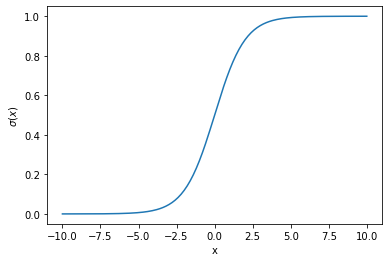

In [30]:
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("$\\sigma(x)$")
plt.show()

Eine ausführlichere Einführung übersteigt dieses Tutorial. Falls Sie pyplot für die Aufgaben benötigen, werden wir geeignete Methoden vorschlagen.